In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df_train=pd.read_csv("SMS_train.csv",encoding='ISO-8859-1')

In [62]:
df_test=pd.read_csv("SMS_test.csv",encoding='ISO-8859-1')

In [63]:
df_train.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [64]:
df_train.drop('S. No.',axis=1,inplace=True)

In [65]:
df_train.shape

(957, 2)

In [66]:
df_train.isna().sum()

Message_body    0
Label           0
dtype: int64

In [67]:
df_train.duplicated().sum()

12

In [68]:
df_train=df_train.drop_duplicates()

In [69]:
df_train['Label'].value_counts()

Non-Spam    825
Spam        120
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

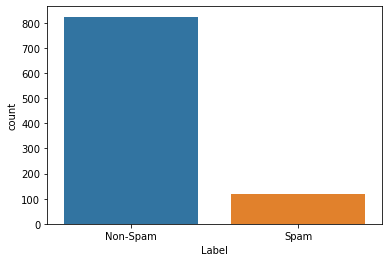

In [70]:
sns.countplot(x='Label', data=df_train)

In [71]:
from wordcloud import WordCloud, STOPWORDS

In [72]:
df = df_train.loc[df_train['Label']=='Spam', :]

df.head()

,Message_body,Label
4,This is the 2nd time we have tried 2 contact u...,Spam
5,REMINDER FROM O2: To get 2.50 pounds free call...,Spam
30,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,Spam
33,Want explicit SEX in 30 secs? Ring 02073162414...,Spam
44,PRIVATE! Your 2003 Account Statement for shows...,Spam


In [73]:
df['Label'].value_counts()

Spam    120
Name: Label, dtype: int64

In [74]:
words = ' '.join(df['Message_body'])
print(words[:2000])

This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate. REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A SHIT. BAILIFF DUE IN DAYS. I O £250 3 WANT £800 Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S.I.M. points. Call 08718738001 Identifier Code: 49557 Expires 26/11/04 You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p p£3.99 PRIVATE! Your 2003 Account Statement for 07808247860 shows 800 un-redeemed S. I. M. points. Call 08719899229 Identifier Code: 40411 Expires 06/11/04 SMS 

In [75]:
df = df_train.loc[df_train['Label']=='Spam', :]

words = ' '.join(df['Message_body'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [76]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

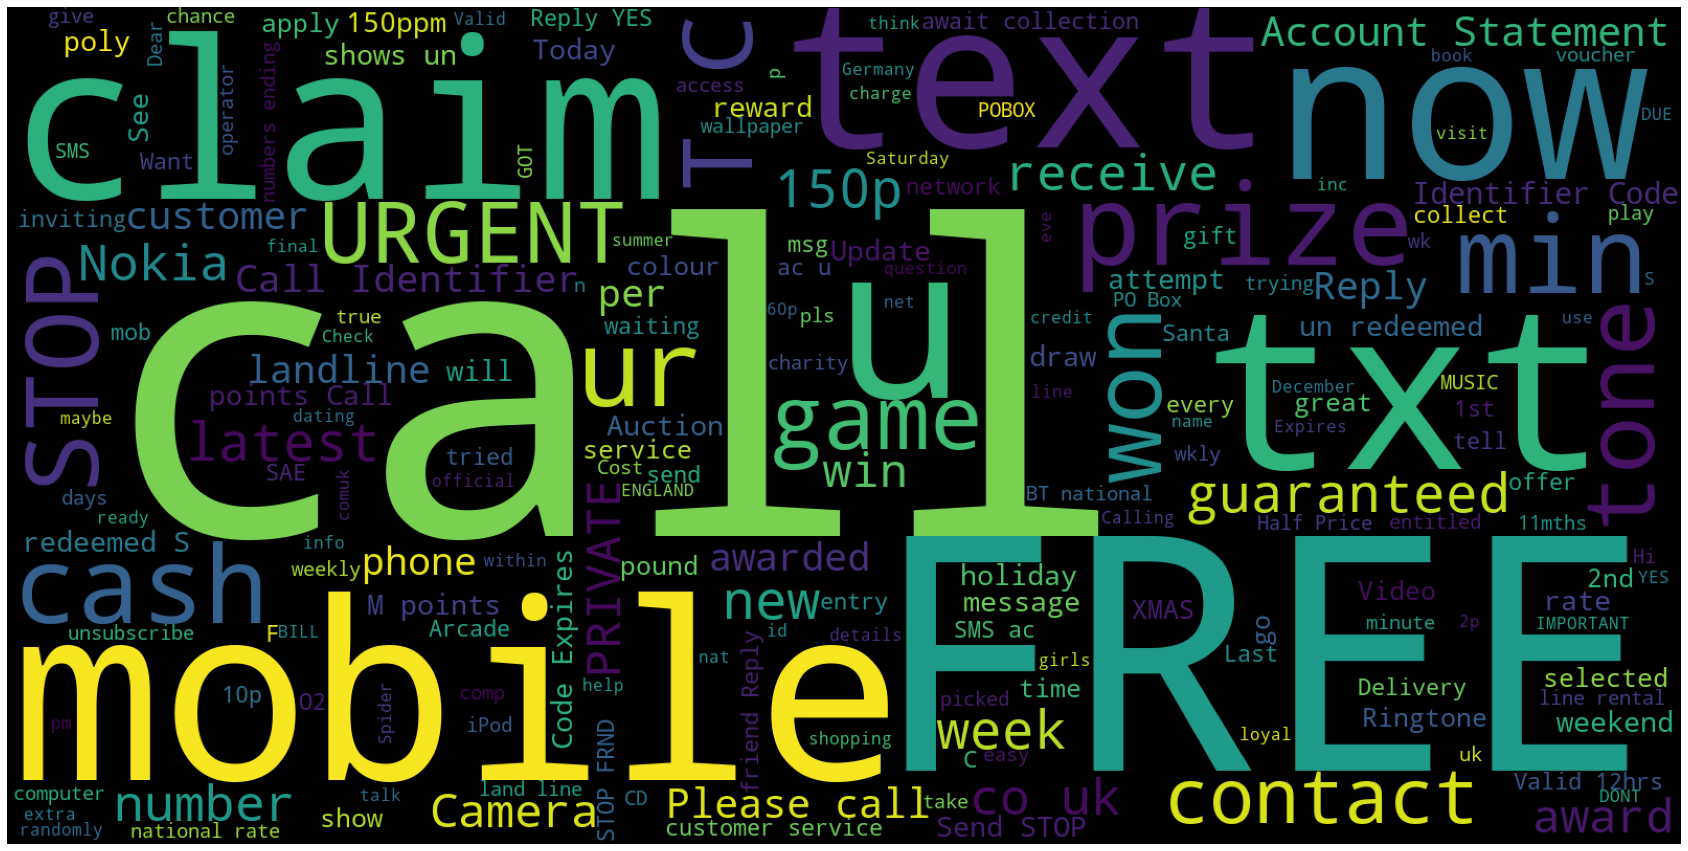

In [77]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We can find that the message with spam frequently involved some words like Free, Claim,Call,Mobile ,guaranteed etc. People might guess that email contains like these words are spam messages.


**3. Data Preprocessing**

Preprocessing steps:
* Removing special characters
* Convert sentence into lower case
* Remove Stop Words
* Stemming or Lemmatization

In [78]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [79]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [80]:
# # We can also use Lemmatizer instead of Stemmer

lemmatizer = WordNetLemmatizer()

In [81]:
# initializing the lists

clean_message_lst = []

message_len_lst = []

In [82]:
def preprocess(raw_message, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_message)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_message_lst.append(" ".join(words))
    
    message_len_lst.append(len(words))

Stemming makes sure that different variations of a word, say ‘warm’, warmer’, ‘warming’ and ‘warmed,’ are represented by a single token - ‘warm’, because they all represent the same information (represented by the 'stem' of the word).

In [83]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

C:\Users\mohd mustakim\anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [84]:
clean_message_lst = []

message_len_lst = []

df_train['Message_body'].progress_apply(lambda x: preprocess(x, 'stem'))

df_train['clean_message_stem'] = clean_message_lst

df_train['message_length_stem'] = message_len_lst

100%|████████████████████████████████████████████████████████████████████████████████| 945/945 [00:12<00:00, 78.66it/s]


In [85]:
df_train.head()

,Message_body,Label,clean_message_stem,message_length_stem
0,Rofl. Its true to its name,Non-Spam,rofl true name,3
1,The guy did some bitching but I acted like i'd...,Non-Spam,guy bitch act like interest buy someth els nex...,13
2,"Pity, * was in mood for that. So...any other s...",Non-Spam,piti mood suggest,3
3,Will ü b going to esplanade fr home?,Non-Spam,b go esplanad fr home,5
4,This is the 2nd time we have tried 2 contact u...,Spam,nd time tri contact u u pound prize claim easi...,17


In [86]:
clean_message_lst = []

message_len_lst = []

df_train['Message_body'].progress_apply(lambda x: preprocess(x, 'lemma'))

df_train['clean_message_lema'] = clean_message_lst

df_train['message_length_lema'] = message_len_lst

100%|███████████████████████████████████████████████████████████████████████████████| 945/945 [00:08<00:00, 114.11it/s]


In [87]:
df_train['Message_body']

0                             Rofl. Its true to its name
1      The guy did some bitching but I acted like i'd...
2      Pity, * was in mood for that. So...any other s...
3                   Will ü b going to esplanade fr home?
4      This is the 2nd time we have tried 2 contact u...
                             ...                        
952    hows my favourite person today? r u workin har...
953                        How much you got for cleaning
954    Sorry da. I gone mad so many pending works wha...
955                                   Wat time ü finish?
956                      Just glad to be talking to you.
Name: Message_body, Length: 945, dtype: object


**4. Data Preparation**
>Let's now prepare the data and build the model.

In [88]:
# Preparing the target variable

df_train['label']=df_train['Label'].apply(lambda x: 0 if x=='Spam' else 1)

df_train.head()



,Message_body,Label,clean_message_stem,message_length_stem,clean_message_lema,message_length_lema,label
0,Rofl. Its true to its name,Non-Spam,rofl true name,3,rofl true name,3,1
1,The guy did some bitching but I acted like i'd...,Non-Spam,guy bitch act like interest buy someth els nex...,13,guy bitching acted like interested buying some...,13,1
2,"Pity, * was in mood for that. So...any other s...",Non-Spam,piti mood suggest,3,pity mood suggestion,3,1
3,Will ü b going to esplanade fr home?,Non-Spam,b go esplanad fr home,5,b going esplanade fr home,5,1
4,This is the 2nd time we have tried 2 contact u...,Spam,nd time tri contact u u pound prize claim easi...,17,nd time tried contact u u pound prize claim ea...,17,0


In [89]:
df_train['label'].value_counts()

1    825
0    120
Name: label, dtype: int64

In [90]:
# splitting into test and train

from sklearn.model_selection  import train_test_split

train, test = train_test_split(df_train,test_size=0.2,random_state=42)

In [91]:


train_clean_message=[]
for message in train['clean_message_stem']:
    train_clean_message.append(message)

test_clean_message=[]
for message in test['clean_message_stem']:
    test_clean_message.append(message)



**Text to numerical vector using Bag of Words**

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2))

train_features = vectorizer.fit_transform(train_clean_message)

test_features = vectorizer.transform(test_clean_message)

In [93]:
vectorizer.vocabulary_

{'yeah': 7030,
 'work': 6877,
 'fine': 1913,
 'start': 5625,
 'last': 3172,
 'week': 6709,
 'stuff': 5735,
 'dull': 1564,
 'easi': 1594,
 'guy': 2518,
 'fun': 2094,
 'yeah work': 7042,
 'work fine': 6880,
 'fine start': 1920,
 'start last': 5628,
 'last week': 3178,
 'week stuff': 6723,
 'stuff dull': 5737,
 'dull easi': 1565,
 'easi guy': 1596,
 'guy fun': 2523,
 'definit': 1360,
 'need': 3938,
 'modul': 3789,
 'human': 2816,
 'di': 1404,
 'sem': 5201,
 'izzit': 2992,
 'wan': 6605,
 'take': 5834,
 'st': 5611,
 'definit need': 1361,
 'need modul': 3953,
 'modul human': 3790,
 'human di': 2817,
 'di sem': 1406,
 'sem izzit': 5202,
 'izzit wan': 2994,
 'wan take': 6611,
 'take modul': 5849,
 'modul st': 3791,
 'per': 4387,
 'min': 3701,
 'call': 706,
 'germani': 2168,
 'bt': 652,
 'line': 3336,
 'check': 905,
 'planettalkinst': 4511,
 'com': 1030,
 'info': 2931,
 'text': 5945,
 'stop': 5689,
 'opt': 4270,
 'per min': 4389,
 'min call': 3703,
 'call germani': 730,
 'germani bt': 2169,
 'b

In [94]:


print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)



Total unique words: 7118
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (756, 7118)


**5. Model Building and Evaluation**

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [96]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)
]

In [97]:
for classifier in Classifiers:
    model = classifier.fit(train_features,train['label'])
    pred = model.predict(test_features)
    accuracy = accuracy_score(pred,test['label'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy)) 

Accuracy of LogisticRegression is 0.9417989417989417
Accuracy of DecisionTreeClassifier is 0.9470899470899471
Accuracy of RandomForestClassifier is 0.9365079365079365


**Saving the Model and Vectorizer in Pickle**

In [98]:
model = LogisticRegression()

model.fit(train_features,train['label'])

LogisticRegression()

In [99]:

#outfile = open(filename,'wb')

In [100]:
from pickle import dump
#filename1 = 'countvectorizer'
dump(vectorizer, open('countvectorizer', 'wb'))
#filename = 'logistic_model'
dump(model, open('logit_model', 'wb'))

**Prediction on Future Data Points**

In [101]:
from pickle import load

In [102]:


from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [103]:
def preprocess(raw_message):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_message)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    clean_sent = " ".join(words)
    
    return clean_sent

In [104]:
def predict(message):
    
    # Loading pretrained CountVectorizer from pickle file
    vectorizer = load(open('countvectorizer', 'rb'))
    
    # Loading pretrained logistic classifier from pickle file
    classifier = load(open('logit_model', 'rb'))
    
    # Preprocessing the tweet
    clean_message = preprocess(message)
    
    # Converting text to numerical vector
    clean_message_encoded = vectorizer.transform([clean_message])
    
    # Prediction
    prediction = classifier.predict(clean_message_encoded)
    
    return prediction

In [110]:
message = input("Enter a message to check whether it's spam or not: ")

prediction = predict(message)

print(prediction)

Enter a message to check whether it's spam or not: FREE entry into our £250 weekly competition just text the word WIN to 80086 NOW. 18 T&C www.txttowin.co.uk
[0]


In [111]:
if(prediction == 0):
    print("spam")
else:
    print("not spam")

spam
